In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

# TASK #3: PERFORM IMAGES VISUALIZATION

2

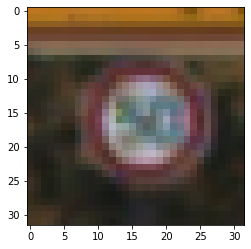

In [9]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

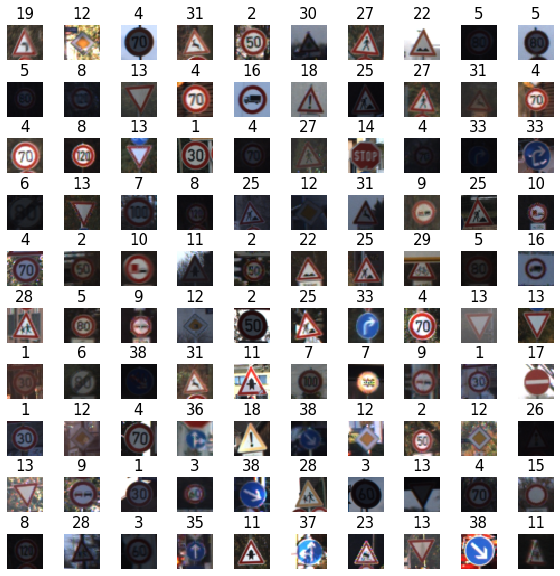

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    # Select a random number
    
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.6)
        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

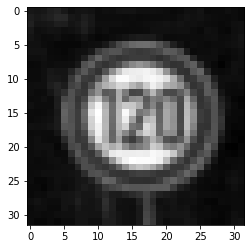

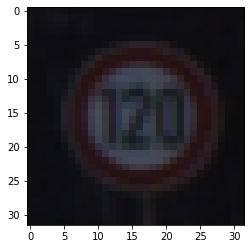

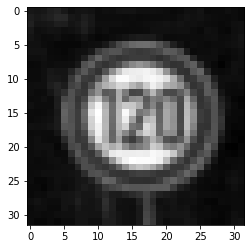

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [17]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
____

In [18]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 nb_epoch = 25,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation) )

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 16s 466us/sample - loss: 0.5335 - acc: 0.8472 - val_loss: 0.6576 - val_acc: 0.8120
Epoch 2/25
34799/34799 [==============================] - 16s 458us/sample - loss: 0.4609 - acc: 0.8693 - val_loss: 0.5972 - val_acc: 0.8231
Epoch 3/25
34799/34799 [==============================] - 16s 456us/sample - loss: 0.4030 - acc: 0.8844 - val_loss: 0.5471 - val_acc: 0.8433
Epoch 4/25
34799/34799 [==============================] - 16s 465us/sample - loss: 0.3617 - acc: 0.8988 - val_loss: 0.5354 - val_acc: 0.8363
Epoch 5/25
34799/34799 [==============================] - 16s 453us/sample - loss: 0.3190 - acc: 0.9113 - val_loss: 0.5305 - val_acc: 0.8535
Epoch 6/25
34799/34799 [==============================] - 16s 455us/sample - loss: 0.2875 - acc: 0.9187 - val_loss: 0.5358 - val_acc: 0.8465
Epoch 7/25
34799/34799 [==============================] - 16s 450us/sample - loss: 0.2679 - acc: 0.9259 -

In [22]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 209us/sample - loss: 0.6486 - acc: 0.8860
Test Accuracy: 0.8859857320785522


In [23]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [27]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

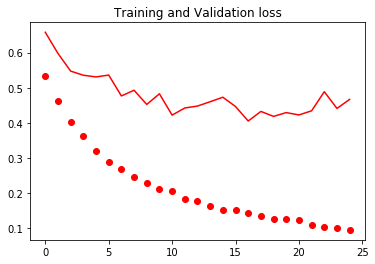

In [31]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

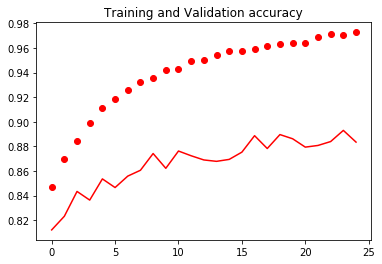

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = "Training accuracy")
plt.plot(epochs, val_accuracy, 'r', label = "Validation accuracy")
plt.title('Training and Validation accuracy')

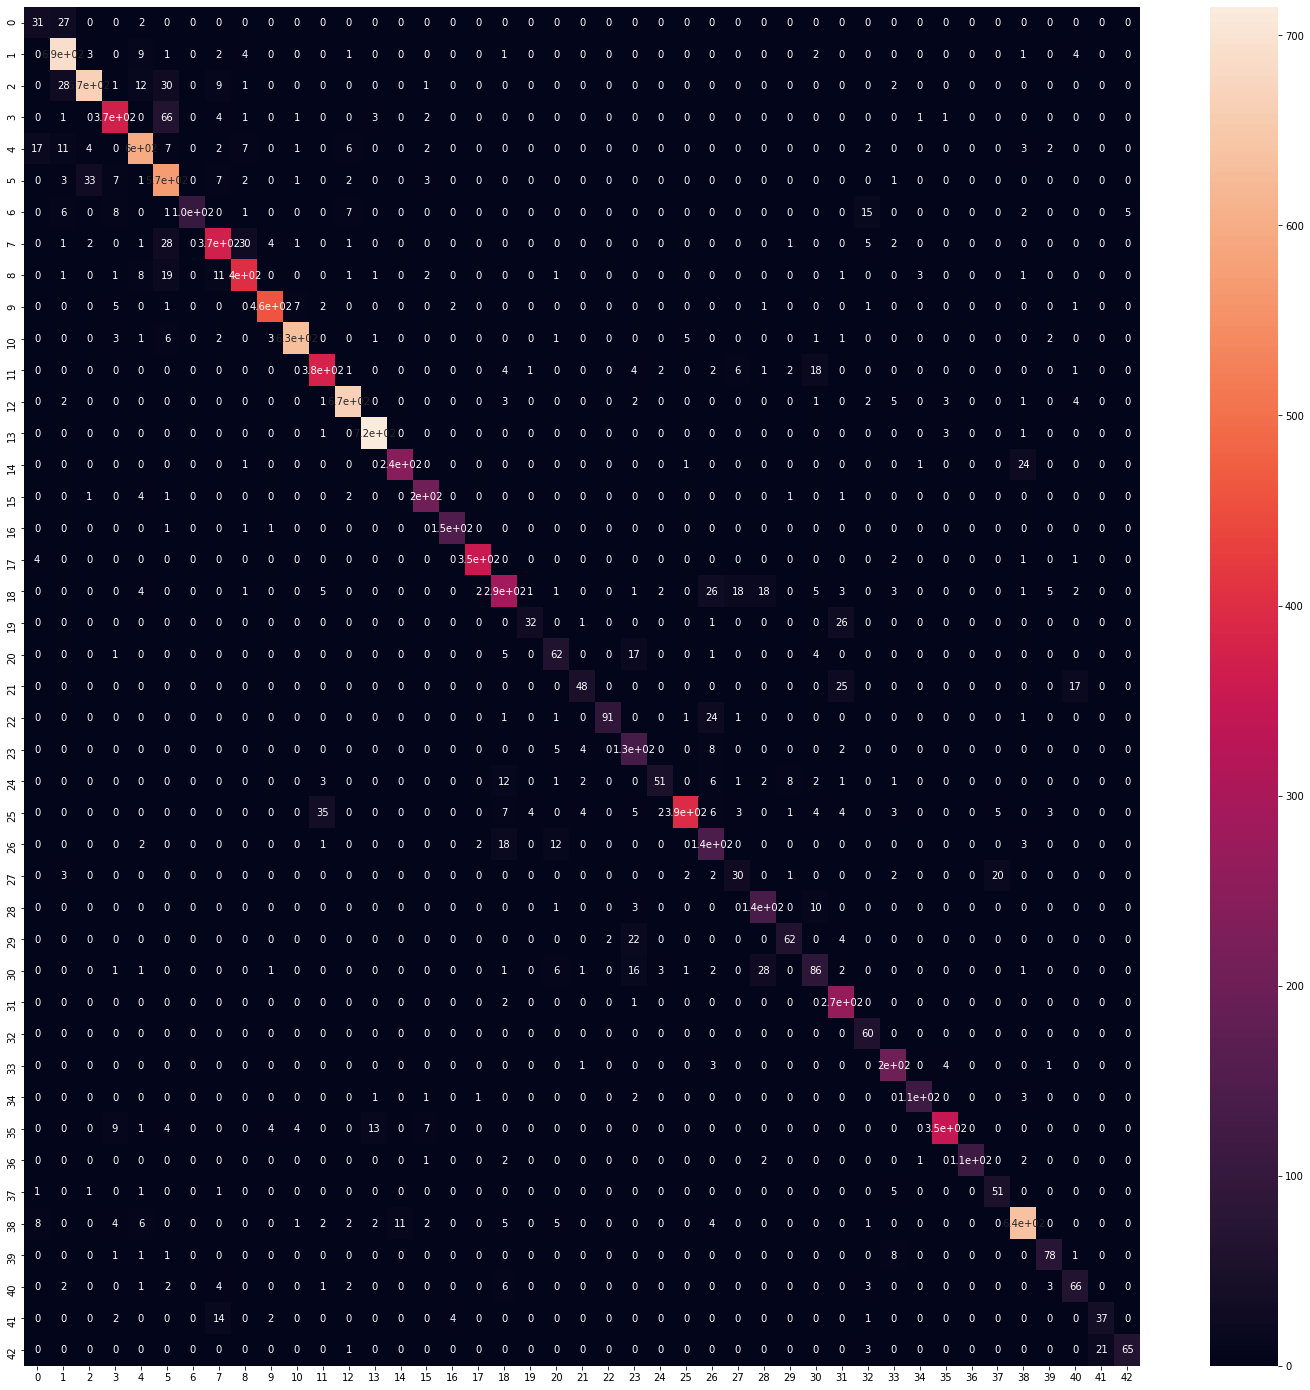

In [34]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

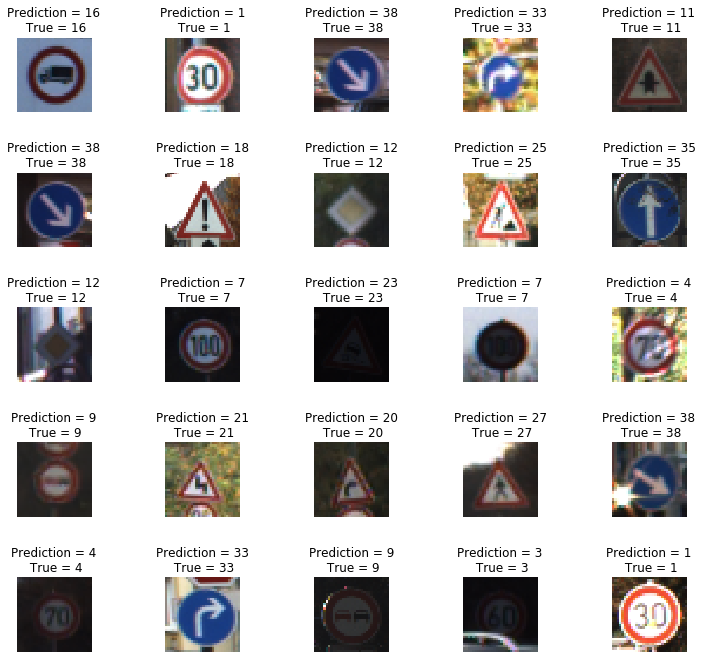

In [37]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    